In [1]:
import pandas as pd
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from datalayer import read_csv_sia, read_sia_model
import utils


pd.set_option('display.max_columns', 500)
%matplotlib inline
%load_ext line_profiler

## Radioterapia


Dates columns


- AP_DTINIC - Data de inicio validade
- AP_DTFIM - Data de fim validade
- AP_DTOCOR - Data de ocorrencia
- AP_DTSOLIC - Data de solicatacao
- AP_DTAUT - Data de autorizacao
- AP_DTIDEN - Data da identificacao patologica
- AR_DTINTR - Data de inicio do tratamento solicitado
- AR_INIAR1 - Data de inicio 1
- AR_FIMAR1 - Data de fim 1

### Reading data... 

In [10]:
import numpy as np
from datetime import timedelta

In [11]:
%time teste = read_sia_model('../data/Pulmão Quimioterapia SIA-SUS.csv', method='quimioterapia')

Reading csv...


/Users/helderrezende/anaconda3/lib/python3.7/site-packages/IPython/core/magics/execution.py:1310: DtypeWarning: Columns (21,38,39,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


Transforming csv to train...


/Users/helderrezende/Documents/naliel_bcggamma/naliel/datalayer.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(path, sep=';', skiprows=4, skipfooter=10, encoding='latin1')
/Users/helderrezende/Documents/naliel_bcggamma/naliel/datalayer.py:60: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(path, sep=';', skiprows=rowsskip, skipfooter=footerrows, encoding='latin1')


CPU times: user 56.8 s, sys: 6.91 s, total: 1min 3s
Wall time: 34.2 s


In [12]:
teste.groupby('AR_ESTADI').count()

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDSEC,AQ_CID10,AQ_LINFIN,AQ_GRAHIS,AR_DTIDEN,AQ_TRANTE,AQ_CIDINI1,AQ_DTINI1,AQ_DTINI2,AQ_CONTTR,AQ_DTINTR,AQ_ESQU_P1,AQ_TOTMPL,AQ_TOTMAU,AQ_ESQU_P2,EWM_MEAN_DELAY,AP_CEPPCN_REGIAO,AP_CEPPCN_SUBREGIAO,AP_CEPPCN_SETOR,AP_CEPPCN_SUBSETOR,AP_CEPPCN_DIVISOR_SUBSETOR,AP_CEPPCN_SUFIXO_DISTRIBUICAO,AP_MUNPCN_NOME,AP_MUNPCN_LATITUDE,AP_MUNPCN_LONGITUDE,AP_MUNPCN_CAPITAL,AP_MUNPCN_CODIGO_UF,AP_UFMUN_NOME,AP_UFMUN_LATITUDE,AP_UFMUN_LONGITUDE,AP_UFMUN_CAPITAL,AP_UFMUN_CODIGO_UF,AP_MUNPCN_GINI,AP_MUNPCN_RDPC,AP_MUNPCN_T_AGUA,AP_MUNPCN_T_BANAGUA,AP_MUNPCN_AGUA_ESGOTO,AP_MUNPCN_T_LIXO,AP_MUNPCN_I_ESCOLARIDADE,AP_MUNPCN_I_FREQ_PROP,AP_MUNPCN_IDHM,AP_MUNPCN_IDHM_E,AP_MUNPCN_IDHM_L,AP_MUNPCN_IDHM_R,AP_MUNPCN_T_SLUZ,AP_CEPPCN_TIPO_SEM_ACENTO,AP_CEPPCN_NOME_LOGRADOURO_SEM_ACENTO,AP_CEPPCN_LOGRADOURO_SEM_ACENTO,AP_CEPPCN_LATITUDE,AP_CEPPCN_LONGITUDE,AP_CODUNI_LATITUDE,AP_CODUNI_LONGITUDE,AP_CODUNI_NOTA,AP_CODUNI_QT,AR_DTIDEN_YEAR_MONTH,AR_DTIDEN_YEAR,AP_MUNPCN_MUNIC-BR,AP_MUNPCN_FREQÜÊNCIA,AP_MUNPCN_POPULAÇÃO,AP_MUNPCN_1.1_%R.LÍQUIDA_TOTAL,AP_MUNPCN_1.2_%TRANSF._INTERGOV._LÍQUIDAS,AP_MUNPCN_1.3_%TRANSF._PARA_A_SAÚDE_(SUS),AP_MUNPCN_1.4_%TRANSF._UNIÃO_P/_SAÚDE,AP_MUNPCN_1.5_%TRANSF._DA_UNIÃO_P/_(SUS),AP_MUNPCN_1.6_%R.IMP._TRANSF.CONST.LEGAIS,AP_MUNPCN_2.1_D.TOTAL_SAÚDE/HAB,AP_MUNPCN_2.2_%D.PESSOAL/D.TOTAL,AP_MUNPCN_2.3_%D.COM_MEDICAMENTOS,AP_MUNPCN_2.4_%D.SERV.TERC/D.TOTAL,AP_MUNPCN_2.5_%D.INVEST/D.TOTAL,AP_MUNPCN_2.10 SUBFUNÇÕES_ADMINISTRATIVAS,AP_MUNPCN_2.20 SUBFUNÇÕES_VINCULADAS,AP_MUNPCN_2.21 ATENÇÃO_BÁSICA,AP_MUNPCN_2.22_ASSIS._HOSP._E_AMBULAT.,AP_MUNPCN_2.23_SUP._PROFILÁTICO_TERAP.,AP_MUNPCN_2.24_VIGILÂNCIA_SANITÁRIA,AP_MUNPCN_2.25_VIGILÂNCIA_EPIDEMIOLÓGICA,AP_MUNPCN_2.26_ALIMENTAÇÃO_E_NUTRIÇÃO,AP_MUNPCN_2.30_INFORMAÇÕES_COMPLEMENTARES,AP_MUNPCN_3.1_%TRANSF.SUS/D.TOTAL,AP_MUNPCN_3.2_%R.PRÓPRIOS_EM_SAÚDE-EC_29,AP_MUNPCN_R.IMPOSTOS_E_TRANSF.CONST,AP_MUNPCN_R.TRANSF.SUS,AP_MUNPCN_R.TRANSF.SUS/HAB,AP_MUNPCN_D.PESSOAL,AP_MUNPCN_D.R.PRÓPRIOS,AP_MUNPCN_D.R.PRÓPRIOS_EM_SAÚDE/HAB,AP_MUNPCN_D.TOTAL_SAÚDE,CLINICAS_AMB_ESPECIALIZADO,HOSPITAL_ESPECIALIZADO,HOSPITAL_GERAL,UN_BASICA_SAUDE,UN_DIAG_TERAPIA,LEITOS_INTERNACAO,MAMOGRAFOS,RAIO_X,TOMAGRAFOS,RESSONANCIA_MAGNETICA,MEDICOS,ENFERMEIROS,DISTANCE_HOSPITAL
AR_ESTADI,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2099,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,2801,95,2801,2801,2555,2771,2484,2307,2801,2801,838,2801,2800,2801,2801,277,347,127,2801,2801,2801,2801,2801,2241,2787,2801,2801,2801,2801,2801,2801,2791,2791,2791,2791,2791,2800,2800,2800,2800,2800,2791,2791,2791,2791,2791,2791,2791,2791,2791,2791,2791,2791,2791,1965,1965,1965,2797,2797,2801,2801,2724,2792,2801,2801,0,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,1219,1219,1219,1219,1219,1219,1219,1219,1219,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782,2797
1,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2191,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,169,2734,2734,2586,2732,2574,2437,2734,2734,1543,2734,2732,2734,2734,375,433,132,2734,2734,2734,2734,2734,2455,2726,2734,2734,2734,2734,2734,2734,2733,2733,2733,2733,2733,2734,2734,2734,2734,2734,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,1953,1952,1953,2732,2732,2734,2734,2708,2734,2734,2734,0,2730,2730,2730,2730,2730,2730,2730,2

In [22]:
review = pd.read_csv('{0}/data/reviews.csv'.format('..'), sep=';')
review['Nota'] = review['Nota'].apply(pd.to_numeric, errors='coerce')
review.columns = [col.upper() for col in review.columns]

In [17]:
data = read_sia_model('../data/Linfomas Quimioterapia SIA-SUS.csv', method='quimioterapia')

Reading csv...


/Users/helderrezende/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: DtypeWarning: Columns (38,39,41,42,44,45,61) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Transforming csv to train...


/Users/helderrezende/Documents/naliel_bcggamma/naliel/datalayer.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(path, sep=';', skiprows=4, skipfooter=10, encoding='latin1')
/Users/helderrezende/Documents/naliel_bcggamma/naliel/datalayer.py:60: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(path, sep=';', skiprows=rowsskip, skipfooter=footerrows, encoding='latin1')


In [23]:
set(data['AP_CODUNI'].unique()) - set(review['AP_CODUNI'].unique())

{2006448,
 2071371,
 2088576,
 2269988,
 2295067,
 2296616,
 2409151,
 2563681,
 2649527,
 2691868,
 2716801,
 4028155,
 4044916,
 5869412,
 6048692,
 6602533,
 6876617,
 7185081,
 7871902}

In [24]:
len(data['AP_CNSPCN'].unique())

93344

In [74]:
data['AP_CNSPCN'].iloc[110]

'\x82{{~{}\x84\x81\x7f\x82}\x81}~|'

In [38]:
data[data['AP_CNSPCN'] == '\x83\x84\x83{{}\x84{}~\x81\x80\x84\x84\x80']

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDSEC,AR_CID10,AR_LINFIN,AR_ESTADI,AR_GRAHIS,AR_DTIDEN,AR_TRANTE,AR_CIDINI1,AR_DTINI1,AR_CONTTR,AR_DTINTR,AR_FINALI,AR_CIDTR1,AR_CIDTR2,AR_NUMC1,AR_INIAR1,AR_INIAR2,AR_FIMAR1,AR_FIMAR2,AR_NUMC2,AR_NUMC3,AP_DTSOLIC-AUT,AP_OCOR_POS_MVM,AP_OCOR_VAL_DT,AP_OCOR_VAL
97,2016-03-01,EP,120000,2001586,1216200068589,2016-03-01,304010090,2278,120040,5,0,I,63602940000170,NaN,{{}{}~,4,66,M,3,120040,10.0,69900001,0,1,2016-03-10,2016-05-31,1,21,0,0,1,0,0,NaT,E120000001,1,0,2001586.0,2016-03-10,2016-03-10,0,0000,NaN,3,4,99,2015-09-22,NaN,NaN,NaN,N,2016-03-10,1,C61,NaN,144.0,2016-03-10,NaN,2016-05-31,NaN,NaN,NaN,0 days,1,NaT,0
110,2016-04-01,EP,120000,2001586,1216200068589,2016-04-01,304010090,2070,120040,5,0,I,63602940000170,NaN,{{}{}~,4,66,M,3,120045,10.0,69925000,0,1,2016-03-10,2016-05-31,2,21,0,0,1,0,0,NaT,E120000001,1,0,2001586.0,2016-03-10,2016-03-10,0,0000,NaN,3,4,99,2015-09-22,NaN,NaN,NaN,N,2016-03-10,1,C61,NaN,144.0,2016-03-10,NaN,2016-05-31,NaN,NaN,NaN,0 days,1,NaT,0
118,2016-05-01,EP,120000,2001586,1216200068589,2016-05-01,304010090,750,120040,5,0,I,63602940000170,NaN,{{}{}~,4,66,M,3,120045,10.0,69925000,0,1,2016-03-10,2016-05-31,2,15,0,0,0,1,0,2016-05-31,E120000001,1,0,2001586.0,2016-03-10,2016-03-10,0,0000,NaN,3,4,99,2015-09-22,NaN,NaN,NaN,N,2016-03-10,1,C61,NaN,144.0,2016-03-10,NaN,2016-05-31,NaN,NaN,NaN,0 days,1,2016-05-31,1


In [76]:
len(data)

19920

In [26]:
data[data['AP_CNSPCN'] == '\x83\x84\x83{{\x7f{||\x83\x81~\x83{\x84']

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDSEC,AR_CID10,AR_LINFIN,AR_ESTADI,AR_GRAHIS,AR_DTIDEN,AR_TRANTE,AR_CIDINI1,AR_DTINI1,AR_CONTTR,AR_DTINTR,AR_FINALI,AR_CIDTR1,AR_CIDTR2,AR_NUMC1,AR_INIAR1,AR_INIAR2,AR_FIMAR1,AR_FIMAR2,AR_NUMC2,AR_NUMC3,AP_DTSOLIC-AUT,AP_OCOR_POS_MVM,AP_OCOR_VAL_DT,AP_OCOR_VAL
0,2014-01-01,EP,120000,2001586,1214200029152,2014-01-01,304010090,1170,120040,5,40,I,63602940000170,NaN,{{{||~{,4,68,M,3,120040,10.0,69900970,0,1,2014-01-21,2014-03-31,1,21,0,0,1,0,0,NaT,E120000001,1,0,2001586.0,2014-01-21,2014-01-21,0,0000,NaN,3,4,99,2013-12-12,NaN,NaN,NaN,N,2014-01-21,1,C61,NaN,144.0,2014-01-21,NaN,2014-03-31,NaN,NaN,NaN,0 days,1,NaT,0
4,2014-02-01,EP,120000,2001586,1214200029152,2014-02-01,304010090,2190,120040,5,40,I,63602940000170,NaN,{{{||~{,4,68,M,3,120040,10.0,69900970,0,1,2014-01-21,2014-03-31,2,15,0,0,0,1,0,2014-02-28,E120000001,1,0,2001586.0,2014-01-21,2014-01-21,0,0000,NaN,3,4,99,2013-12-12,NaN,NaN,NaN,N,2014-01-21,1,C61,NaN,144.0,2014-01-21,NaN,2014-03-31,NaN,NaN,NaN,0 days,1,2014-02-28,1


In [31]:
data[data['AP_CNSPCN'] == '\x83\x84\x83{{}~\x81}\x82\x83\x80\x80\x80\x83']

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDSEC,AR_CID10,AR_LINFIN,AR_ESTADI,AR_GRAHIS,AR_DTIDEN,AR_TRANTE,AR_CIDINI1,AR_DTINI1,AR_CONTTR,AR_DTINTR,AR_FINALI,AR_CIDTR1,AR_CIDTR2,AR_NUMC1,AR_INIAR1,AR_INIAR2,AR_FIMAR1,AR_FIMAR2,AR_NUMC2,AR_NUMC3,AP_DTSOLIC-AUT,AP_OCOR_POS_MVM,AP_OCOR_VAL_DT,AP_OCOR_VAL
5,2014-02-01,EP,120000,2001586,1214200045311,2014-02-01,304010090,1890,120040,5,40,I,63602940000170,NaN,{{}~},4,78,M,3,120040,10.0,69900970,0,1,2014-02-10,2014-04-30,1,21,0,0,1,0,0,NaT,E120000001,1,0,2001586.0,2014-02-10,2014-02-10,0,0000,NaN,3,4,99,2014-01-03,NaN,NaN,NaN,N,2014-02-10,1,C61,NaN,144.0,2014-02-10,NaN,2014-04-30,NaN,NaN,NaN,0 days,1,NaT,0
10,2014-03-01,EP,120000,2001586,1214200045311,2014-03-01,304010090,2550,120040,5,40,I,63602940000170,NaN,{{}~},4,78,M,3,120040,10.0,69900970,0,1,2014-02-10,2014-04-30,2,15,0,0,0,1,0,2014-03-31,E120000001,1,0,2001586.0,2014-02-10,2014-02-10,0,0000,NaN,3,4,99,2014-01-03,NaN,NaN,NaN,N,2014-02-10,1,C61,NaN,144.0,2014-02-10,NaN,2014-04-30,NaN,NaN,NaN,0 days,1,2014-03-31,1


In [ ]:
data[data['AP_CNSPCN']

In [28]:
data.iloc[10]

AP_MVM             2014-03-01 00:00:00
AP_CONDIC                           EP
AP_GESTAO                       120000
AP_CODUNI                      2001586
AP_AUTORIZ               1214200045311
                          ...         
AR_NUMC3                           NaN
AP_DTSOLIC-AUT         0 days 00:00:00
AP_OCOR_POS_MVM                      1
AP_OCOR_VAL_DT     2014-03-31 00:00:00
AP_OCOR_VAL                          1
Name: 10, Length: 66, dtype: object

In [14]:
data.sort_values('AP_OCOR_VAL', ascending=False)[['AP_OCOR_POS_MVM']]

,AP_OCOR_POS_MVM
71227,1
186374,1
80547,1
80544,1
80543,1
...,...
94595,1
94596,1
94597,1
94598,1


In [13]:
data_model = read_sia_model('../data/Prostata Radioterapia SIA-SUS.csv', 'radioterapia')

b'Skipping line 40771: expected 74 fields, saw 113\n'
/Users/helderrezende/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: DtypeWarning: Columns (38,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/helderrezende/Documents/naliel_bcggamma/naliel/external_data.py:39: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  skiprows=3, skipfooter=2, encoding='latin1')
/Users/helderrezende/Documents/naliel_bcggamma/naliel/datalayer.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(path, sep=';', skiprows=4, skipfooter=10, encoding='latin1')
/Users/helderrezende/Documents/naliel_bcggamma/naliel/datalayer.py:59: ParserWarning: Fallin

In [15]:
data_model[['AP_CODUNI', 'AP_CODUNI_LATITUDE' , 'AP_CODUNI_LONGITUDE', 'AP_UFMUN', 'AP_MUNPCN_NOME']]

,AP_CODUNI,AP_CODUNI_LATITUDE,AP_CODUNI_LONGITUDE,AP_UFMUN,AP_MUNPCN_NOME
0,2001586,-9.977400,-67.805850,120040,Rio Branco
1,2001586,-9.977400,-67.805850,120040,Rio Branco
2,2001586,-9.977400,-67.805850,120040,Rio Branco
3,2001586,-9.977400,-67.805850,120040,Epitaciolândia
4,2001586,-9.977400,-67.805850,120040,Rio Branco
5,2001586,-9.977400,-67.805850,120040,Brasiléia
6,2001586,-9.977400,-67.805850,120040,Rio Branco
7,2001586,-9.977400,-67.805850,120040,Sena Madureira
8,2001586,-9.977400,-67.805850,120040,Rio Branco
9,2001586,-9.977400,-67.805850,120040,Xapuri


In [3]:
data[['AP_CODUNI']]

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_DTINIC,AP_DTFIM,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_DTOCOR,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AR_CID10,AR_LINFIN,AR_ESTADI,AR_GRAHIS,AR_DTIDEN,AR_TRANTE,AR_CIDINI1,AR_DTINI1,AR_DTINI2,AR_CONTTR,AR_DTINTR,AR_FINALI,AR_CIDTR1,AR_CIDTR2,AR_NUMC1,AR_INIAR1,AR_INIAR2,AR_FIMAR1,AR_FIMAR2,AR_NUMC2,AR_NUMC3,AP_CEPPCN_REGIAO,AP_CEPPCN_SUBREGIAO,AP_CEPPCN_SETOR,AP_CEPPCN_SUBSETOR,AP_CEPPCN_DIVISOR_SUBSETOR,AP_CEPPCN_SUFIXO_DISTRIBUICAO,AP_MUNPCN_nome,AP_MUNPCN_latitude,AP_MUNPCN_longitude,AP_MUNPCN_capital,AP_MUNPCN_codigo_uf,AP_UFMUN_nome,AP_UFMUN_latitude,AP_UFMUN_longitude,AP_UFMUN_capital,AP_UFMUN_codigo_uf,AP_CEPPCN_BAIRRO,AP_CEPPCN_COMPLEMENTO
0,201401,EP,120000,2001586,1214200029119,201401,304010090,614,120040,5,40,I,63602940000170,NaN,{{~,4,8,M,3,120050,10,69940000,0,2014-01-23,2014-02-28,1,21,0,0,1,0,0,NaT,E120000001,1,0.0,2001586.0,2014-01-23,2014-01-23,0000,C81- Linfoma de Hodgkin,0000,NaN,S,2.0,99,2013-06-19,NaN,NaN,NaN,NaN,N,2013-01-27,2,C811,NaN,34.0,2013-01-27,NaN,2014-02-28,NaN,NaN,NaN,6,9,9,4,4,0,Sena Madureira,-9.06596,-68.6571,0.0,12.0,Rio Branco,-9.97499,-67.8243,1,12,NaN,NaN
1,201402,EP,120000,2001586,1214200045201,201402,304010090,2098,120040,5,40,I,63602940000170,NaN,{{}~~{},4,75,M,3,120040,10,69900970,0,2014-02-12,2014-04-30,1,21,0,0,1,0,0,NaT,E120000001,1,0.0,2001586.0,2014-02-12,2014-02-12,0000,C81- Linfoma de Hodgkin,0000,NaN,N,2.0,99,2013-10-16,NaN,NaN,NaN,NaN,N,2014-02-12,1,C61,NaN,144.0,2014-02-12,NaN,2014-04-30,NaN,NaN,NaN,6,9,9,0,0,970,Rio Branco,-9.97499,-67.8243,1.0,12.0,Rio Branco,-9.97499,-67.8243,1,12,Centro,"Avenida Epaminondas Jácome, 2858"
2,201402,EP,120000,2001586,1214200029119,201402,304010090,630,120040,5,40,I,63602940000170,NaN,{{~,4,8,M,3,120050,10,69940000,0,2014-01-23,2014-02-28,2,15,0,0,0,1,0,2014-02-28,E120000001,1,0.0,2001586.0,2014-01-23,2014-01-23,0000,C81- Linfoma de Hodgkin,0000,NaN,S,2.0,99,2013-06-19,NaN,NaN,NaN,NaN,N,2013-01-27,2,C811,NaN,34.0,2013-01-27,NaN,2014-02-28,NaN,NaN,NaN,6,9,9,4,4,0,Sena Madureira,-9.06596,-68.6571,0.0,12.0,Rio Branco,-9.97499,-67.8243,1,12,NaN,NaN
3,201403,EP,120000,2001586,1214200045201,201403,304010090,2550,120040,5,40,I,63602940000170,NaN,{{}~~{},4,75,M,3,120040,10,69900970,0,2014-02-12,2014-04-30,2,15,0,0,0,1,0,2014-03-31,E120000001,1,0.0,2001586.0,2014-02-12,2014-02-12,0000,C81- Linfoma de Hodgkin,0000,NaN,N,2.0,99,2013-10-16,NaN,NaN,NaN,NaN,N,2014-02-12,1,C61,NaN,144.0,2014-02-12,NaN,2014-03-31,NaN,NaN,NaN,6,9,9,0,0,970,Rio Branco,-9.97499,-67.8243,1.0,12.0,Rio Branco,-9.97499,-67.8243,1,12,Centro,"Avenida Epaminondas Jácome, 2858"
4,201405,EP,120000,2001586,1214200084944,201405,304010090,810,120040,5,40,I,63602940000170,NaN,}{{{{{|}{{{~,4,13,M,3,120020,10,69980000,0,2014-03-18,2014-05-31,2,15,0,0,0,1,0,2014-05-31,E120000001,1,0.0,2001586.0,2014-03-18,2014-03-18,0000,C81- Linfoma de Hodgkin,0000,NaN,S,3.0,99,2012-05-05,NaN,NaN,NaN,NaN,N,2014-03-18,2,C810,NaN,60.0,2014-03-18,NaN,2014-05-31,NaN,NaN,NaN,6,9,9,8,8,0,Cruzeiro do Sul,-7.62762,-72.6756,0.0,12.0,Rio Branco,-9.97499,-67.8243,1,12,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19920 entries, 0 to 19919
Data columns (total 81 columns):
AP_MVM                           19920 non-null int64
AP_CONDIC                        19920 non-null object
AP_GESTAO                        19920 non-null int64
AP_CODUNI                        19920 non-null int64
AP_AUTORIZ                       19920 non-null int64
AP_CMP                           19920 non-null int64
AP_PRIPAL                        19920 non-null int64
AP_VL_AP                         19920 non-null int64
AP_UFMUN                         19920 non-null int64
AP_TPUPS                         19920 non-null int64
AP_TIPPRE                        19920 non-null int64
AP_MN_IND                        19920 non-null object
AP_CNPJCPF                       19920 non-null int64
AP_CNPJMNT                       12755 non-null float64
AP_CNSPCN                        19920 non-null object
AP_COIDADE                       19920 non-null int64
AP_NUIDADE            

### Analyzing Numerical Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a247d9cf8>,
      dtype=object)

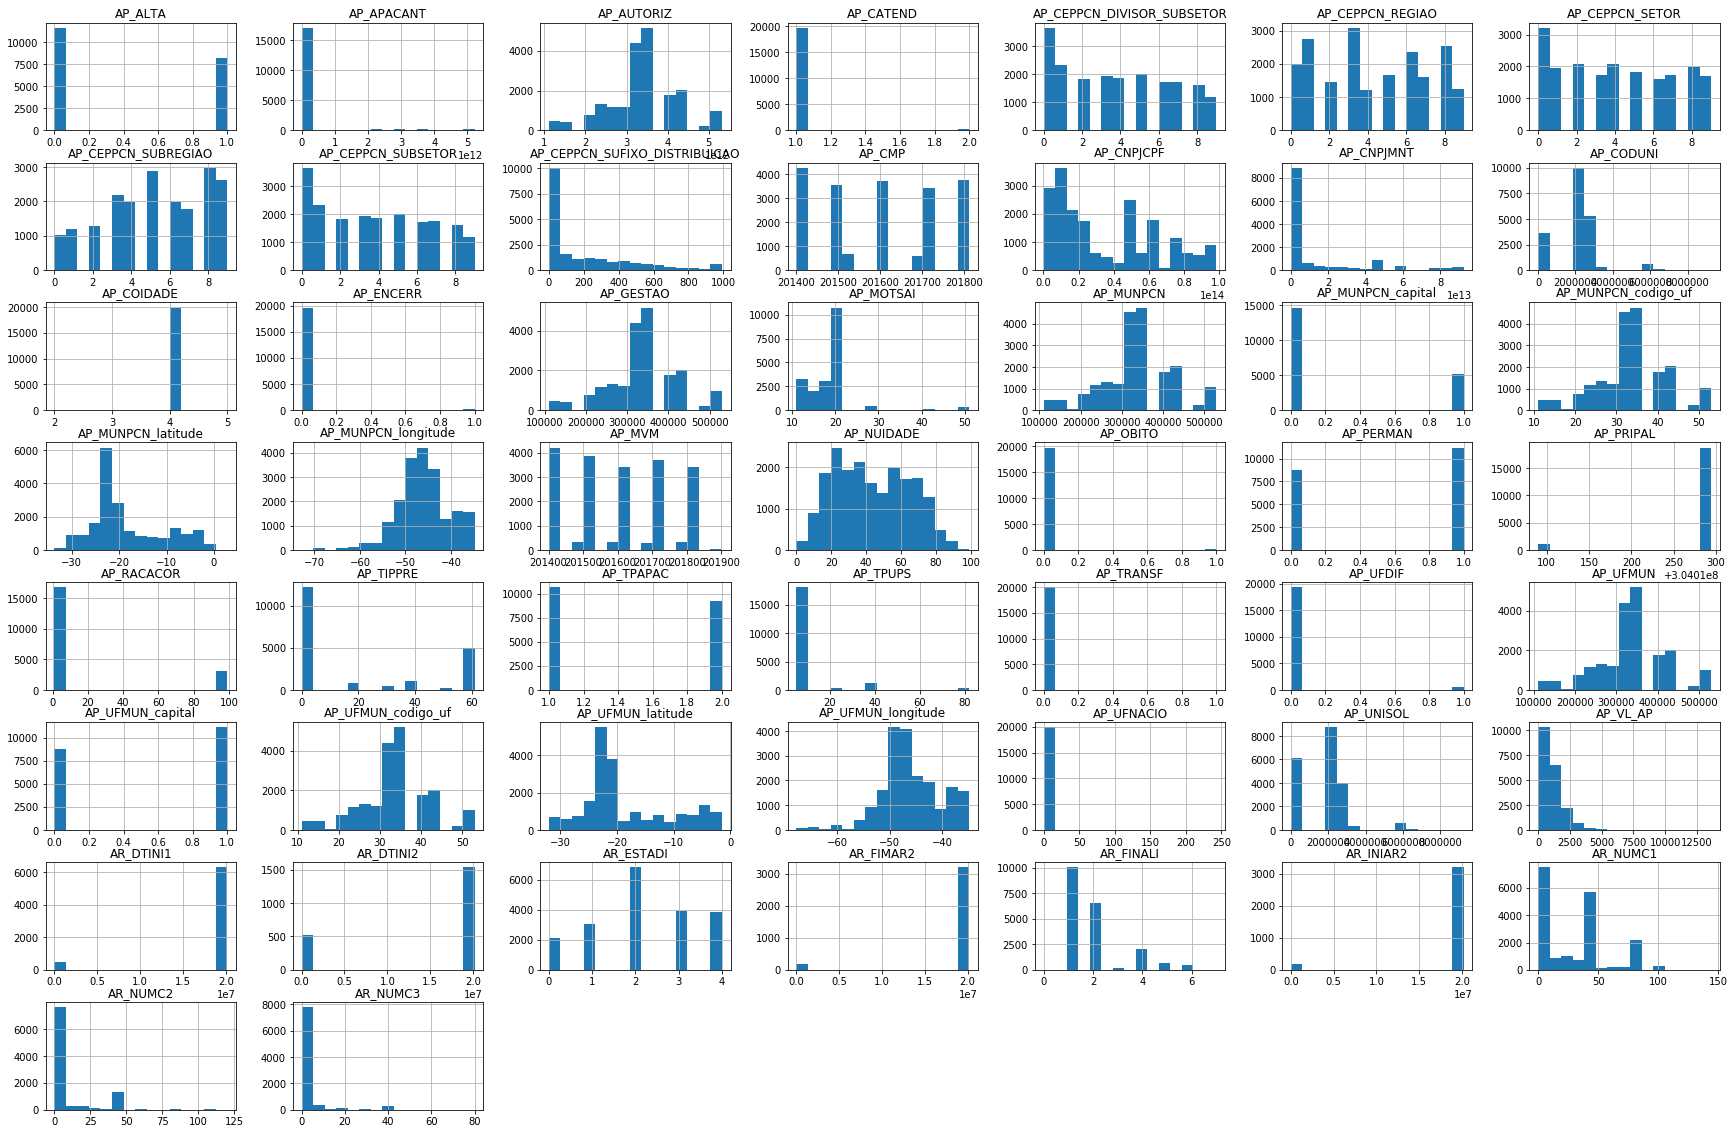

In [5]:
numerical = data._get_numeric_data().columns
data[numerical].hist(bins=15, figsize=(30, 20))

## Quimioterapia

Dates columns


- AP_DTINIC - Data de inicio validade
- AP_DTFIM - Data de fim validade
- AP_DTSOLIC - Data de solicatacao
- AP_DTAUT - Data de autorizacao
- AQ_DTIDEN - Data da identificacao patologica
- AQ_DTINTR - Data de inicio do tratamento solicitado

In [6]:
data = read_csv_sia('../data/Linfomas Quimioterapia SIA-SUS.csv', method='quimioterapia')

/Users/helderrezende/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (38,39,41,42,44,45,61) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
data.head()

,AP_MVM,AP_CONDIC,AP_GESTAO,AP_CODUNI,AP_AUTORIZ,AP_CMP,AP_PRIPAL,AP_VL_AP,AP_UFMUN,AP_TPUPS,AP_TIPPRE,AP_MN_IND,AP_CNPJCPF,AP_CNPJMNT,AP_CNSPCN,AP_COIDADE,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_CEPPCN,AP_UFDIF,AP_MNDIF,AP_DTINIC,AP_DTFIM,AP_TPAPAC,AP_MOTSAI,AP_OBITO,AP_ENCERR,AP_PERMAN,AP_ALTA,AP_TRANSF,AP_CODEMI,AP_CATEND,AP_APACANT,AP_UNISOL,AP_DTSOLIC,AP_DTAUT,AP_CIDCAS,AP_CIDPRI,AP_CIDSEC,AQ_CID10,AQ_LINFIN,AQ_ESTADI,AQ_GRAHIS,AQ_DTIDEN,AQ_TRANTE,AQ_CIDINI1,AQ_DTINI1,AQ_DTINI2,AQ_CONTTR,AQ_DTINTR,AQ_ESQU_P1,AQ_TOTMPL,AQ_TOTMAU,AQ_ESQU_P2,AP_CEPPCN_REGIAO,AP_CEPPCN_SUBREGIAO,AP_CEPPCN_SETOR,AP_CEPPCN_SUBSETOR,AP_CEPPCN_DIVISOR_SUBSETOR,AP_CEPPCN_SUFIXO_DISTRIBUICAO,AP_MUNPCN_nome,AP_MUNPCN_latitude,AP_MUNPCN_longitude,AP_MUNPCN_capital,AP_MUNPCN_codigo_uf,AP_UFMUN_nome,AP_UFMUN_latitude,AP_UFMUN_longitude,AP_UFMUN_capital,AP_UFMUN_codigo_uf,AP_CEPPCN_BAIRRO,AP_CEPPCN_COMPLEMENTO
0,201401,EP,120000,2001586,1213200185967,201401,304060011,1258.64,120040,5,40,I,6.360294e+13,NaN,{}{{}{{,4,20,M,3,120040,10,69900970,0,1,2013-11-05,2014-01-31,2,21,0,0,1,0,0,E120000001,1,0000000000000,2001586,2013-11-05,2013-11-05,0000,C81- Linfoma de Hodgkin,0000,NaN,3,3.0,99,2013-05-19,0,NaN,NaN,NaN,S,2013-08-19,ABVD,6,3,NaN,6,9,9,0,0,970,Rio Branco,-9.97499,-67.8243,1.0,12.0,Rio Branco,-9.97499,-67.8243,1,12,Centro,"Avenida Epaminondas Jácome, 2858"
1,201401,EP,120000,2001586,1213200175561,201401,304060011,1258.64,120040,5,40,I,6.360294e+13,NaN,{{|{||,4,46,M,3,120040,10,69900970,0,1,2013-11-05,2014-01-31,2,21,0,0,1,0,0,E120000001,1,0000000000000,0,2013-11-05,2013-11-05,0000,C81- Linfoma de Hodgkin,0000,NaN,3,3.0,99,2005-06-02,0,NaN,NaN,NaN,S,2013-08-01,ABVD,6,3,NaN,6,9,9,0,0,970,Rio Branco,-9.97499,-67.8243,1.0,12.0,Rio Branco,-9.97499,-67.8243,1,12,Centro,"Avenida Epaminondas Jácome, 2858"
2,201401,EP,120000,2001586,1213200175528,201401,304060011,1258.64,120040,5,40,I,6.360294e+13,NaN,{{{{|}{|},4,20,M,3,120040,10,69900970,0,1,2013-11-05,2014-01-31,2,21,0,0,1,0,0,E120000001,1,0000000000000,0,2013-11-05,2013-11-05,0000,C81- Linfoma de Hodgkin,0000,NaN,3,3.0,99,2013-05-19,0,NaN,NaN,NaN,S,2013-08-19,ABVD,6,3,NaN,6,9,9,0,0,970,Rio Branco,-9.97499,-67.8243,1.0,12.0,Rio Branco,-9.97499,-67.8243,1,12,Centro,"Avenida Epaminondas Jácome, 2858"
3,201401,EP,120000,2001586,1213200177266,201401,304060011,1258.64,120040,5,40,I,6.360294e+13,NaN,{{{{{}~},4,61,M,3,120001,10,69945000,0,1,2013-11-05,2014-01-31,2,21,0,0,1,0,0,E120000001,1,0000000000000,0,2013-11-05,2013-11-05,0000,C81- Linfoma de Hodgkin,0000,NaN,3,3.0,99,2013-09-19,0,NaN,NaN,NaN,N,2013-08-09,VIMBL,6,3,AS+DAVARBA,6,9,9,4,4,0,Acrelândia,-9.82581,-66.8972,0.0,12.0,Rio Branco,-9.97499,-67.8243,1,12,NaN,NaN
4,201401,EP,120000,2001586,1213200186275,201401,304070017,1700.00,120040,5,40,I,6.360294e+13,NaN,{{{{{,4,18,F,3,120040,10,69900970,0,1,2013-11-28,2014-01-31,2,21,0,0,1,0,0,E120000001,1,0000000000000,2001586,2013-11-28,2013-11-28,0000,C81- Linfoma de Hodgkin,0000,NaN,3,2.0,99,2013-10-31,0,NaN,NaN,NaN,N,2013-11-28,ABVD,6,0,NaN,6,9,9,0,0,970,Rio Branco,-9.97499,-67.8243,1.0,12.0,Rio Branco,-9.97499,-67.8243,1,12,Centro,"Avenida Epaminondas Jácome, 2858"


In [8]:
data.groupby('AQ_ESTADI')['AQ_ESTADI'].count()

AQ_ESTADI
0.0    70384
1.0    31607
2.0    55267
3.0    73850
4.0    72823
Name: AQ_ESTADI, dtype: int64